In [2]:
import os
import pickle
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
path = './experiments/no_os/x_oversampling/label/beerslaw/simplestates_cluster/ts_attention/binconcepts/2023_06_13_0_baseline/results/nonnested_cval_mltsatt_l300.pkl'
#baseline
with open(path, 'rb') as f:
    data = pickle.load(f)

roc_scores = []
ba_scores = []
for i in range(10):
    roc_scores.append(data[i]['roc'])
    ba_scores.append(data[i]['balanced_accuracy'])
roc_score = np.mean(roc_scores)
ba_score = np.mean(ba_scores)
print(roc_score, ba_score)

0.783066933066933 0.708966033966034


In [4]:
def compute_score(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    roc_scores = []
    ba_scores = []
    scores = []
    for i in range(10):
        roc_scores.append(data[i]['roc'])
        ba_scores.append(data[i]['balanced_accuracy'])
    roc_score = np.mean(roc_scores)
    ba_score = np.mean(ba_scores)
    scores.append(roc_score)
    scores.append(ba_score)
    return scores

In [21]:
base_path = 'experiments/coins/equal_balancing_oversampling/label/beerslaw/simplestates_cluster/ts_attention/binconcepts/'
output_file = 'scores.csv'

with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Directory', 'ROC score', 'BA score'])
    
    for directory in os.listdir(base_path):
        if os.path.isdir(base_path + directory):
            file_path = base_path + directory + '/results/nonnested_cval_mltsatt_l300.pkl'
            if os.path.isfile(file_path):
                scores = compute_score(file_path)
                roc_score = scores[0]
                ba_score = scores[1]
                writer.writerow([directory, roc_score, ba_score])


In [22]:
df = pd.read_csv('scores.csv', sep=',', header=0)
df.columns = ['Directory', 'ROC score', 'BA score']

df[['Type', 'Coin']] = df['Directory'].str.rsplit('_', n=1, expand=True)
df['Coin'] = df['Coin'].astype(int)
df['ROC score'] = df['ROC score'].astype(float)
df['ROC score'] = df['ROC score'].round(3)
df['BA score'] = df['BA score'].astype(float)
df['BA score'] = df['BA score'].round(3)

df.sort_values(['Type', 'Coin'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [23]:
df

,Directory,ROC score,BA score,Type,Coin
0,binconcept_coin_2,0.768,0.707,binconcept_coin,2
1,binconcept_coin_5,0.767,0.704,binconcept_coin,5
2,binconcept_coin_10,0.768,0.718,binconcept_coin,10
3,field_coin_2,0.773,0.692,field_coin,2
4,field_coin_5,0.785,0.722,field_coin,5
5,field_coin_10,0.778,0.726,field_coin,10
6,field_language_coin_2,0.775,0.712,field_language_coin,2
7,field_language_coin_5,0.771,0.701,field_language_coin,5
8,field_language_coin_10,0.781,0.723,field_language_coin,10
9,full_coin_2,0.752,0.684,full_coin,2


In [ ]:
label = df[0:3]
nonoise = df[21:24]
shuffle = df[33:36]


In [69]:
def plot_scores(subdf,rotation):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # ROC score
    cmap = cm.get_cmap('Blues')

    for i, (directory, score) in enumerate(zip(subdf['Directory'], subdf['ROC score'])):
        #color = cmap((i % 6 + 1) / 7)
        color = cmap((i % 3 + 1) / 4)
        axes[0].bar(directory, score, color=color)

    axes[0].set_xlabel('Directory')
    axes[0].set_ylabel('ROC score')
    axes[0].set_title('Markov chains Score')
    axes[0].set_ylim(0.7, 0.8)
    axes[0].axhline(y=0.783066933066933, color='r', linestyle='--', label='baseline')
    axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)

    # Balanced accuracy
    cmap = cm.get_cmap('Greens')

    for i, (directory, score) in enumerate(zip(subdf['Directory'], subdf['BA score'])):
        #color = cmap((i % 6 + 1) / 7)
        color = cmap((i % 3 + 1) / 4)
        axes[1].bar(directory, score, color=color)

    axes[1].set_xlabel('Directory')
    axes[1].set_ylabel('BA score')
    axes[1].set_title('Markov chains Score')
    axes[1].set_ylim(0.65, 0.75)
    axes[1].axhline(y=0.708966033966034, color='r', linestyle='--', label='baseline')
    axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)
    
    plt.tight_layout()
    plt.show()


/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/3003574775.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)
/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/3003574775.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)


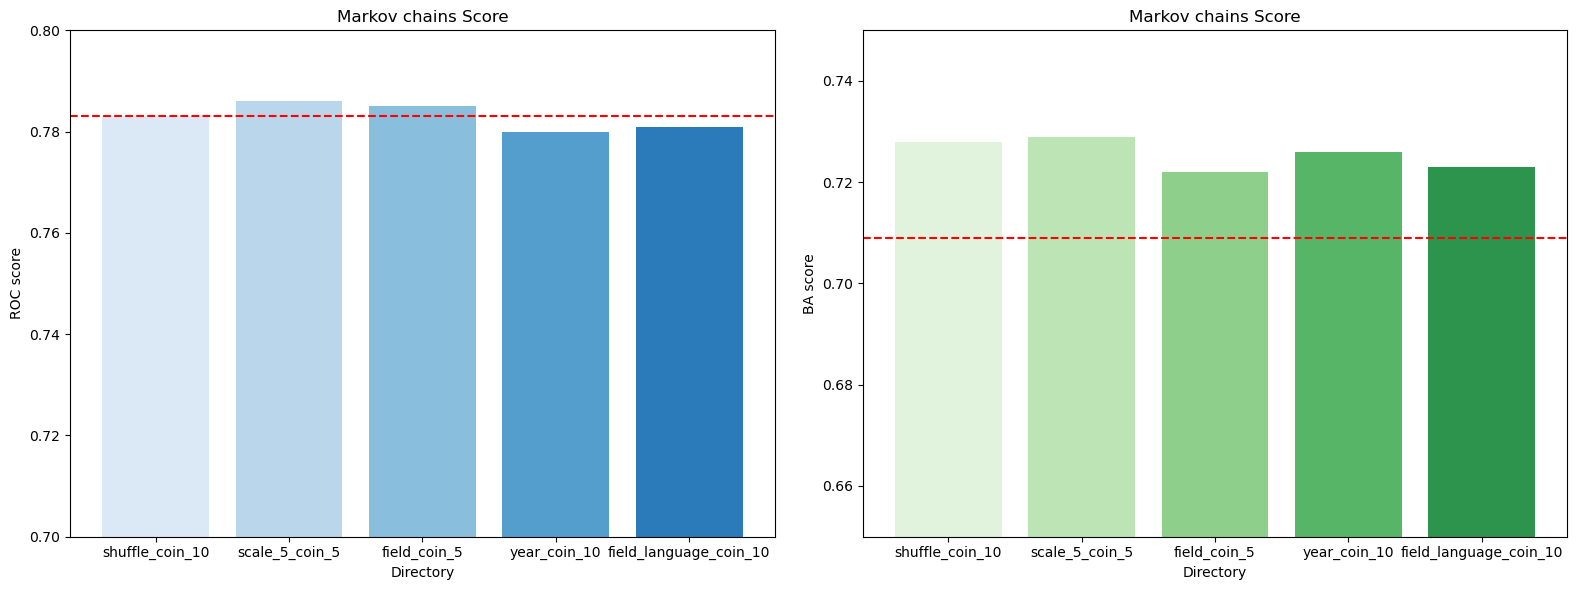

In [68]:
best_subdf = df.iloc[[29, 25, 4, 32, 8]]
plot_scores(best_subdf, 0)

/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)
/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)


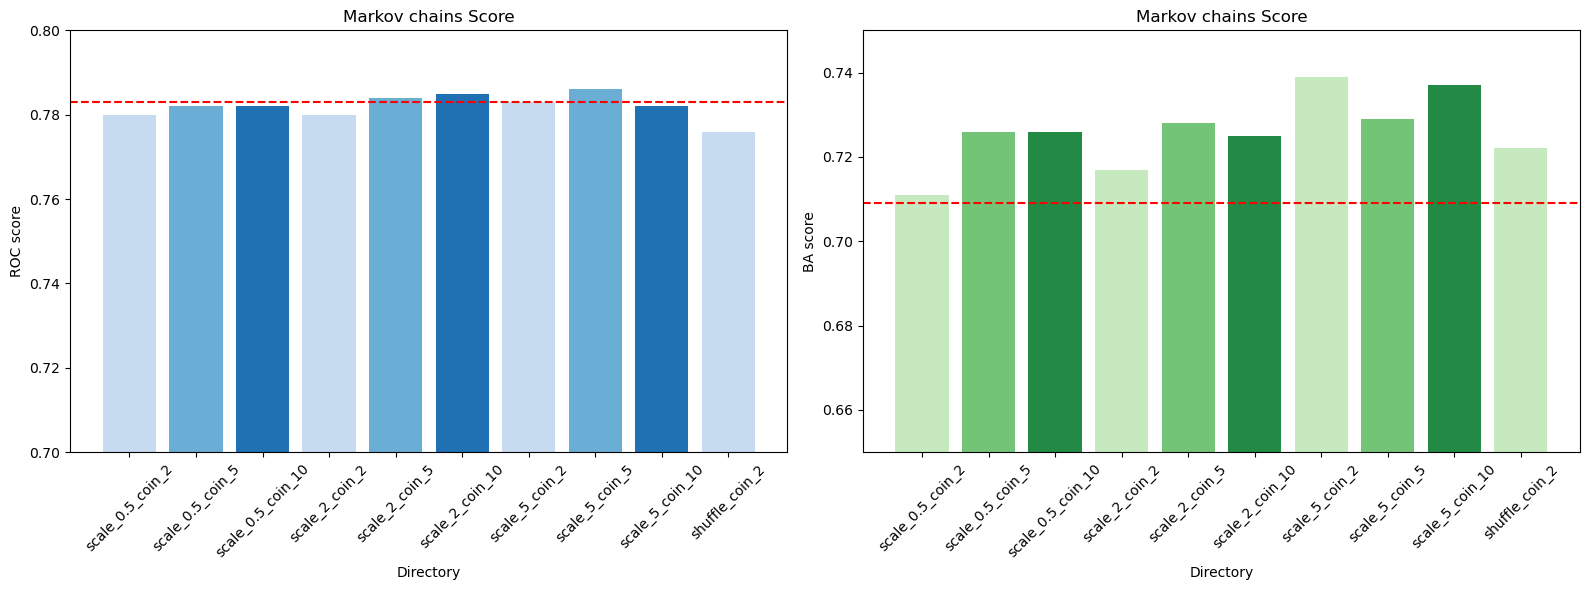

In [70]:
scale_subdf = df[18:28]
plot_scores(scale_subdf, 45)

/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)
/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)


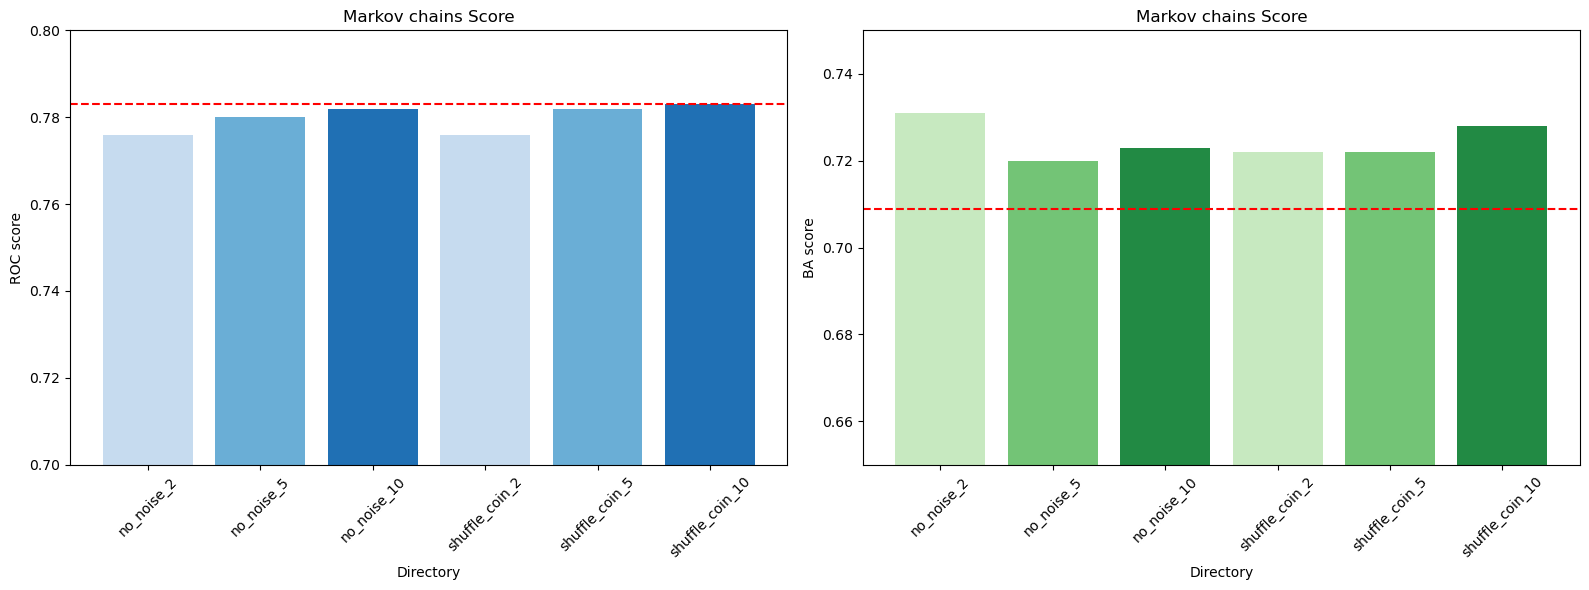

In [78]:
shuffle = df[27:30]
no_noise = df[15:18]
subdf = pd.concat([nonoise, shuffle])
plot_scores(subdf, 45)

/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)
/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)


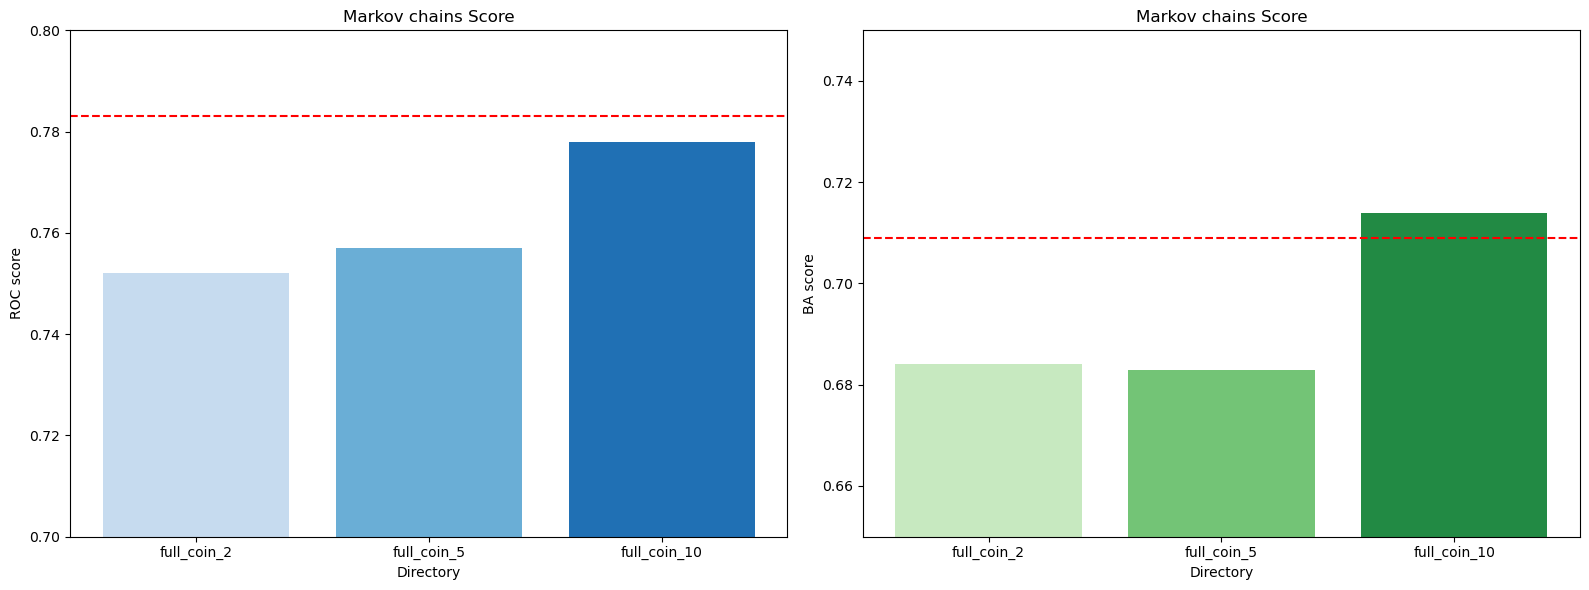

In [77]:
full_chain = df[9:12]
plot_scores(full_chain,0)

/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)
/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)


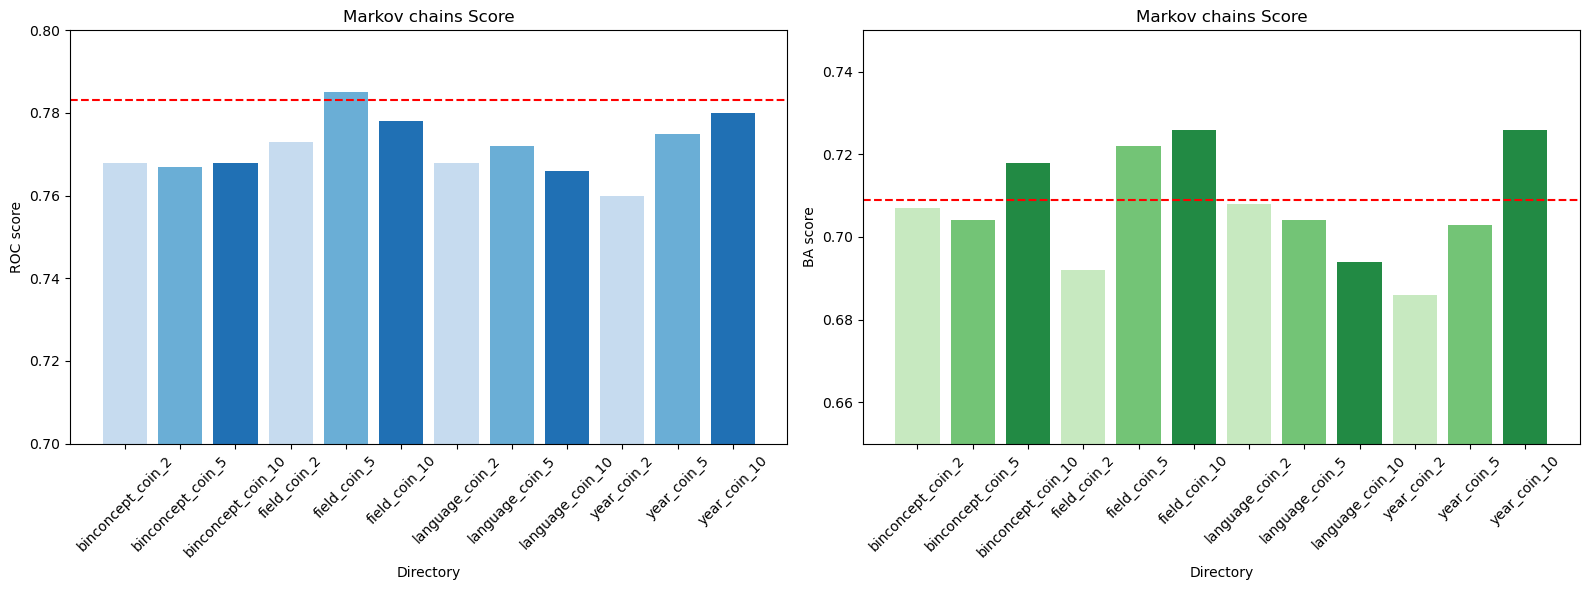

In [76]:
label = df[0:3]
field = df[3:6]
language = df[12:15]
year = df[30:33]
sub_df = pd.concat([label, field, language, year])
plot_scores(sub_df, 45)

/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(subdf['Directory'], rotation=rotation)
/var/folders/n_/v26qgmwj4b58xc320yhsw9kw0000gn/T/ipykernel_59474/2798587826.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(subdf['Directory'], rotation=rotation)


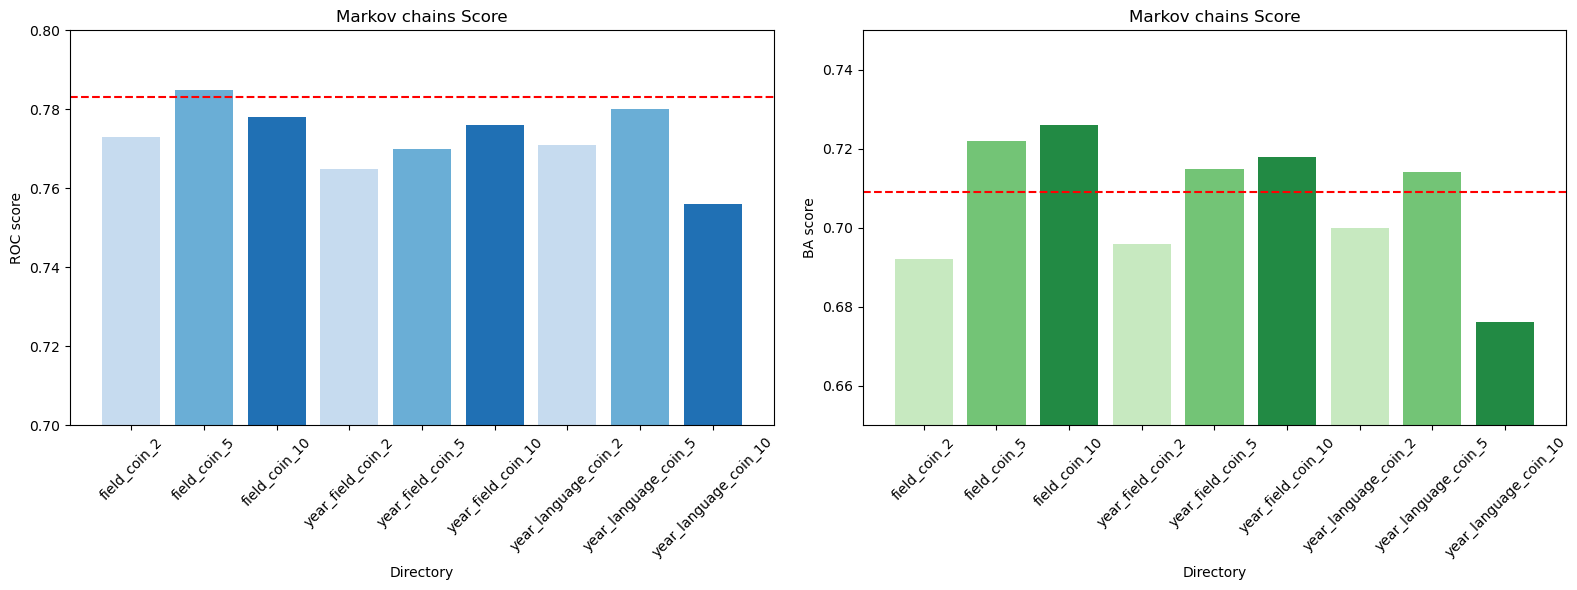

In [80]:
year_field = df[33:36]
year_language = df[36:]
field_language = df[3:6]
subdf = pd.concat([field_language, year_field, year_language])
plot_scores(subdf, 45)